chainerのインストール
---

In [4]:
!apt -y install libcusparse8.0 libnvrtc8.0 libnvtoolsext1
!ln -snf /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so.8.0 /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so
!pip install https://github.com/kmaehashi/chainer-colab/releases/download/2018-02-06/cupy_cuda80-4.0.0b3-cp36-cp36m-linux_x86_64.whl
!pip install 'chainer==4.0.0b3'

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libcusparse8.0 is already the newest version (8.0.61-1).
libnvrtc8.0 is already the newest version (8.0.61-1).
libnvtoolsext1 is already the newest version (8.0.61-1).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.


インポート
---

In [0]:
import numpy as np
import chainer
from chainer import cuda, Function, gradient_check, report, training, utils, Variable
from chainer import datasets, iterators, optimizers, serializers
from chainer import Link, Chain, ChainList
import chainer.functions as F
import chainer.links as L
from chainer.training import extensions
from chainer.datasets import tuple_dataset


ConvCSNet
---
[ConvCSNet: A Convolutional Compressive Sensing Framework Based on Deep Learning](https://arxiv.org/abs/1801.10342)

In [0]:
class ConvCSNet(Chain):
    def __init__(self, k, m, s):
        super(ConvCSNet, self).__init__(

            cs_c1 = L.Convolution2D(None, m, k, stride=s, pad=k//2),
            cs_c2 = L.Convolution2D(None, 96, 3, pad=1),
            cs_c3 = L.Convolution2D(None, 96, 3, pad=1),
            cs_c4 = L.Convolution2D(None, 96, 3, pad=1),
            cs_c5 = L.Convolution2D(None, 96, 3, pad=1),
            cs_c6 = L.Convolution2D(None, 96, 3, pad=1),
            cs_c7 = L.Convolution2D(None, 96, 3, pad=1),
            cs_c8 = L.Convolution2D(None, 96, 3, pad=1),
            cs_c9 = L.Convolution2D(None, 96, 3, pad=1),
            cs_c10 = L.Convolution2D(None, 96, 3, pad=1),
            cs_c11 = L.Convolution2D(None, 96, 3, pad=1),
            cs_c12 = L.Convolution2D(None, 96, 3, pad=1),
            cs_c13 = L.Convolution2D(None, 96, 3, pad=1),
            cs_c14 = L.Convolution2D(None, 96, 3, pad=1),
            cs_c15 = L.Convolution2D(None, 96, 3, pad=1),
            
            recon_c1 = L.Convolution2D(None, 1, k, pad=k // 2),
            recon_c2 = L.Convolution2D(None, 1, 3, pad=1),
            recon_c3 = L.Convolution2D(None, 1, 3, pad=1),
            recon_c4 = L.Convolution2D(None, 1, 3, pad=1),
            recon_c5 = L.Convolution2D(None, 1, 3, pad=1),
            recon_c6 = L.Convolution2D(None, 1, 3, pad=1),
            recon_c7 = L.Convolution2D(None, 1, 3, pad=1),
            recon_c8 = L.Convolution2D(None, 1, 3, pad=1),
            recon_c9 = L.Convolution2D(None, 1, 3, pad=1),
            recon_c10 = L.Convolution2D(None, 1, 3, pad=1),
            recon_c11 = L.Convolution2D(None, 1, 3, pad=1),
            recon_c12 = L.Convolution2D(None, 1, 3, pad=1),
            recon_c13 = L.Convolution2D(None, 1, 3, pad=1),
            recon_c14 = L.Convolution2D(None, 1, 3, pad=1),
            recon_c15 = L.Convolution2D(None, 1, 3, pad=1),
            
            )
        self.k = k
        self.m = m
        self.s = s

    def __call__(self, x):
        
        cs = self.cs_c1(x)
        
        h = Variable(cuda.cupy.zeros((x.shape[0], self.m, x.shape[2], x.shape[3]), cuda.cupy.float32))
        for row in range(cs.shape[2]):
          for col in range(cs.shape[3]):
            h.data[:, :, row * self.s, col * self.s] = cs.data[:, :, row, col]
        
        y0 = self.recon_c1(h)
        
        h = F.relu(self.cs_c2(h))
        y = self.recon_c2(h) 
        h = F.relu(self.cs_c3(h))
        y = self.recon_c3(h) + y0 + y 
        h = F.relu(self.cs_c4(h))
        y = self.recon_c4(h) + y0 + y 
        h = F.relu(self.cs_c5(h))
        y = self.recon_c5(h) + y0 + y 
        h = F.relu(self.cs_c6(h))
        y = self.recon_c6(h) + y0 + y 
        h = F.relu(self.cs_c7(h))
        y = self.recon_c7(h) + y0 + y 
        h = F.relu(self.cs_c8(h))
        y = self.recon_c8(h) + y0 + y 
        h = F.relu(self.cs_c9(h))
        y = self.recon_c9(h) + y0 + y 
        h = F.relu(self.cs_c10(h))
        y = self.recon_c10(h) + y0 + y 
        h = F.relu(self.cs_c11(h))
        y = self.recon_c11(h) + y0 + y 
        h = F.relu(self.cs_c12(h))
        y = self.recon_c12(h) + y0 + y 
        h = F.relu(self.cs_c13(h))
        y = self.recon_c13(h) + y0 + y 
        h = F.relu(self.cs_c14(h))
        y = self.recon_c14(h) + y0 + y 
        h = F.relu(self.cs_c15(h))
        y = self.recon_c15(h) + y0 + y 
        
        return y


In [19]:
from google.colab import files
uploaded = files.upload()

Saving BSD100.tar to BSD100.tar


In [20]:
!tar -xvf BSD100.tar

BSD100/
BSD100/._img_018_SRF_2_HR.png
BSD100/img_018_SRF_2_HR.png
BSD100/._img_058_SRF_2_HR.png
BSD100/img_058_SRF_2_HR.png
BSD100/._img_096_SRF_2_HR.png
BSD100/img_096_SRF_2_HR.png
BSD100/._img_069_SRF_2_HR.png
BSD100/img_069_SRF_2_HR.png
BSD100/._img_091_SRF_2_HR.png
BSD100/img_091_SRF_2_HR.png
BSD100/._img_084_SRF_2_HR.png
BSD100/img_084_SRF_2_HR.png
BSD100/._img_083_SRF_2_HR.png
BSD100/img_083_SRF_2_HR.png
BSD100/._img_029_SRF_2_HR.png
BSD100/img_029_SRF_2_HR.png
BSD100/._img_059_SRF_2_HR.png
BSD100/img_059_SRF_2_HR.png
BSD100/._img_019_SRF_2_HR.png
BSD100/img_019_SRF_2_HR.png
BSD100/._img_028_SRF_2_HR.png
BSD100/img_028_SRF_2_HR.png
BSD100/._img_082_SRF_2_HR.png
BSD100/img_082_SRF_2_HR.png
BSD100/._img_085_SRF_2_HR.png
BSD100/img_085_SRF_2_HR.png
BSD100/._img_090_SRF_2_HR.png
BSD100/img_090_SRF_2_HR.png
BSD100/._img_068_SRF_2_HR.png
BSD100/img_068_SRF_2_HR.png
BSD100/._img_097_SRF_2_HR.png
BSD100/img_097_SRF_2_HR.png
BSD100/._img_062_SRF_2_HR.png
BSD100/img_062_SRF_2_HR.png
BSD100

In [71]:
import glob
from skimage.io import imread
from skimage.transform import rotate

files = glob.glob('BSD100/*')

ims = []
for file in files:
  im = imread(file, as_grey=True)
  row, col = im.shape
  if row > col:
    im = im[160:320, 80:240]
  else:
    im = im[80:240, 160:320]
  ims.append(im)
  for ang in [90, 180, 270]:
    ims.append(rotate(im, ang))

ims = np.array(ims).astype(np.float32)
ims.shape

(400, 160, 160)

In [103]:
batch_size = 1
N_epoch = 30
gpu = 0
N_train = 360

train = tuple_dataset.TupleDataset(ims[:N_train, np.newaxis, :, :], ims[:N_train, np.newaxis, :, :])
test  = tuple_dataset.TupleDataset(ims[N_train:, np.newaxis, :, :],  ims[N_train:, np.newaxis, :, :])

model = L.Classifier(ConvCSNet(17, 8, 8),  lossfun=F.mean_squared_error)
model.compute_accuracy = False
model.to_gpu(gpu)

optimizer = chainer.optimizers.Adam()
optimizer.setup(model)

train_iter = chainer.iterators.SerialIterator(train, batch_size)
test_iter = chainer.iterators.SerialIterator(test, batch_size, repeat=False, shuffle=False)

updater = training.updaters.StandardUpdater(train_iter, optimizer, device=gpu)

trainer = training.Trainer(updater, (N_epoch, 'epoch'))

trainer.extend(extensions.Evaluator(test_iter, model, device=gpu))

trainer.extend(extensions.LogReport())
trainer.extend(extensions.PrintReport(['epoch', 'main/loss', 'validation/main/loss', 'elapsed_time']))
  
trainer.run()


epoch       main/loss   validation/main/loss  elapsed_time
1           0.0235509   0.00788791            86.2585       
2           0.00834121  0.00538543            172.538       
3           0.00770495  0.00542126            258.923       
4           0.00772846  0.00644083            345.308       
5           0.00783838  0.00543815            431.552       
6           0.00770145  0.00625449            517.798       
7           0.00760229  0.00528727            603.944       
8           0.00767168  0.00530483            690.104       
9           0.00752555  0.00626608            776.139       
10          0.00762584  0.00525119            861.996       
11          0.00778027  0.00540245            947.848       
12          0.00741364  0.00565664            1033.66       
13          0.0072703   0.00569367            1119.51       
14          0.00739507  0.00512447            1205.32       
15          0.00773893  0.00518673            1291.17       
16          0.00708096  0.

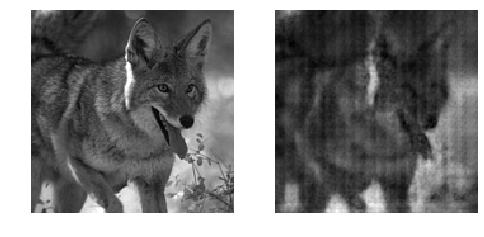

In [107]:
import matplotlib.pyplot as plt

y = model.predictor(cuda.cupy.array(ims[N_train:N_train + 1, np.newaxis, :, :]))
y = cuda.to_cpu(y.data)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(ims[N_train], cmap='gray')
ax[1].imshow(y[0, 0], cmap='gray')
for a in ax:
  a.axis('off')
  
plt.savefig("result.png", dpi=220)